CREDIT CARD DETECTION

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv("creditcard.csv")

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


EXLORATARY DATA ANALYSIS

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
#checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values

In [10]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Visual Analysis

Text(0, 0.5, 'Frequency')

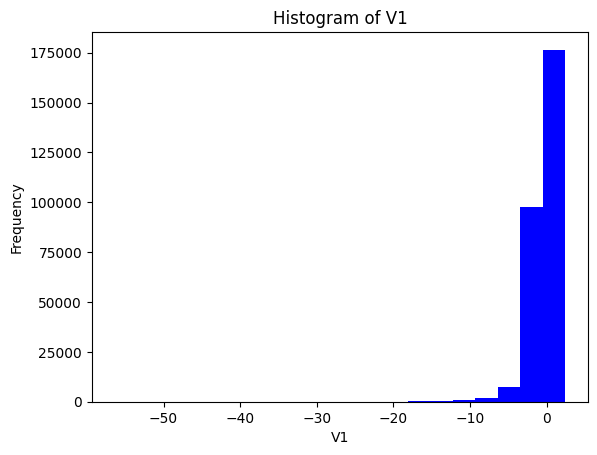

In [15]:
plt.hist(df['V1'],bins=20,color='blue')
plt.title('Histogram of V1')
plt.xlabel('V1')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

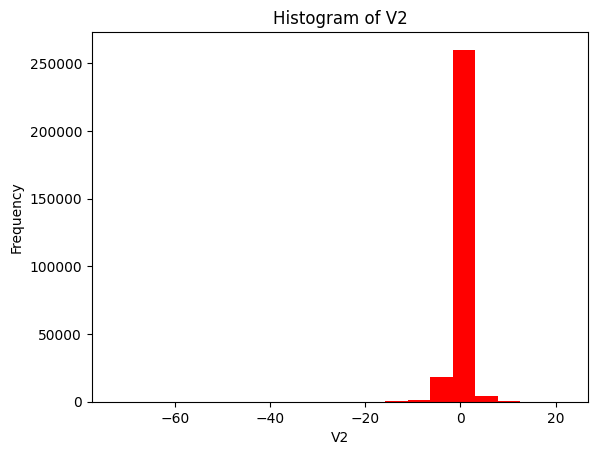

In [17]:
plt.hist(df['V2'],bins=20,color='red')
plt.title('Histogram of V2')
plt.xlabel('V2')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

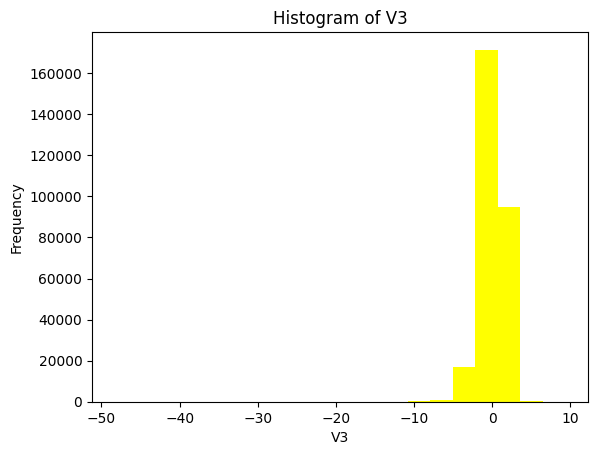

In [18]:
plt.hist(df['V3'],bins=20,color='yellow')
plt.title('Histogram of V3')
plt.xlabel('V3')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

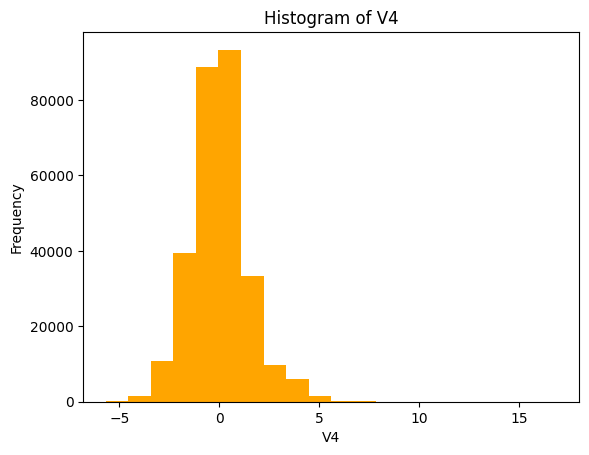

In [20]:
plt.hist(df['V4'],bins=20,color='orange')
plt.title('Histogram of V4')
plt.xlabel('V4')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

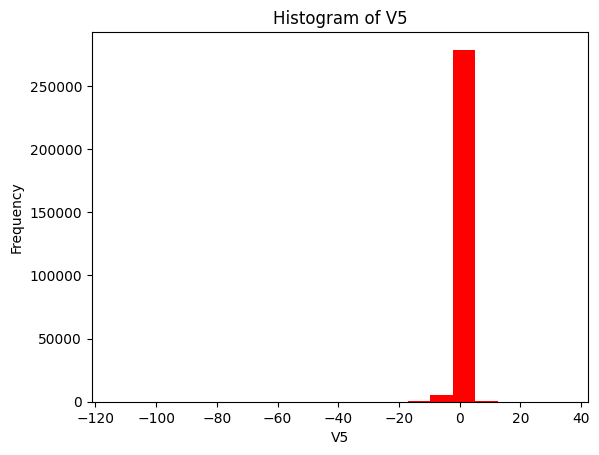

In [21]:
plt.hist(df['V5'],bins=20,color='red')
plt.title('Histogram of V5')
plt.xlabel('V5')
plt.ylabel('Frequency')


<Axes: >

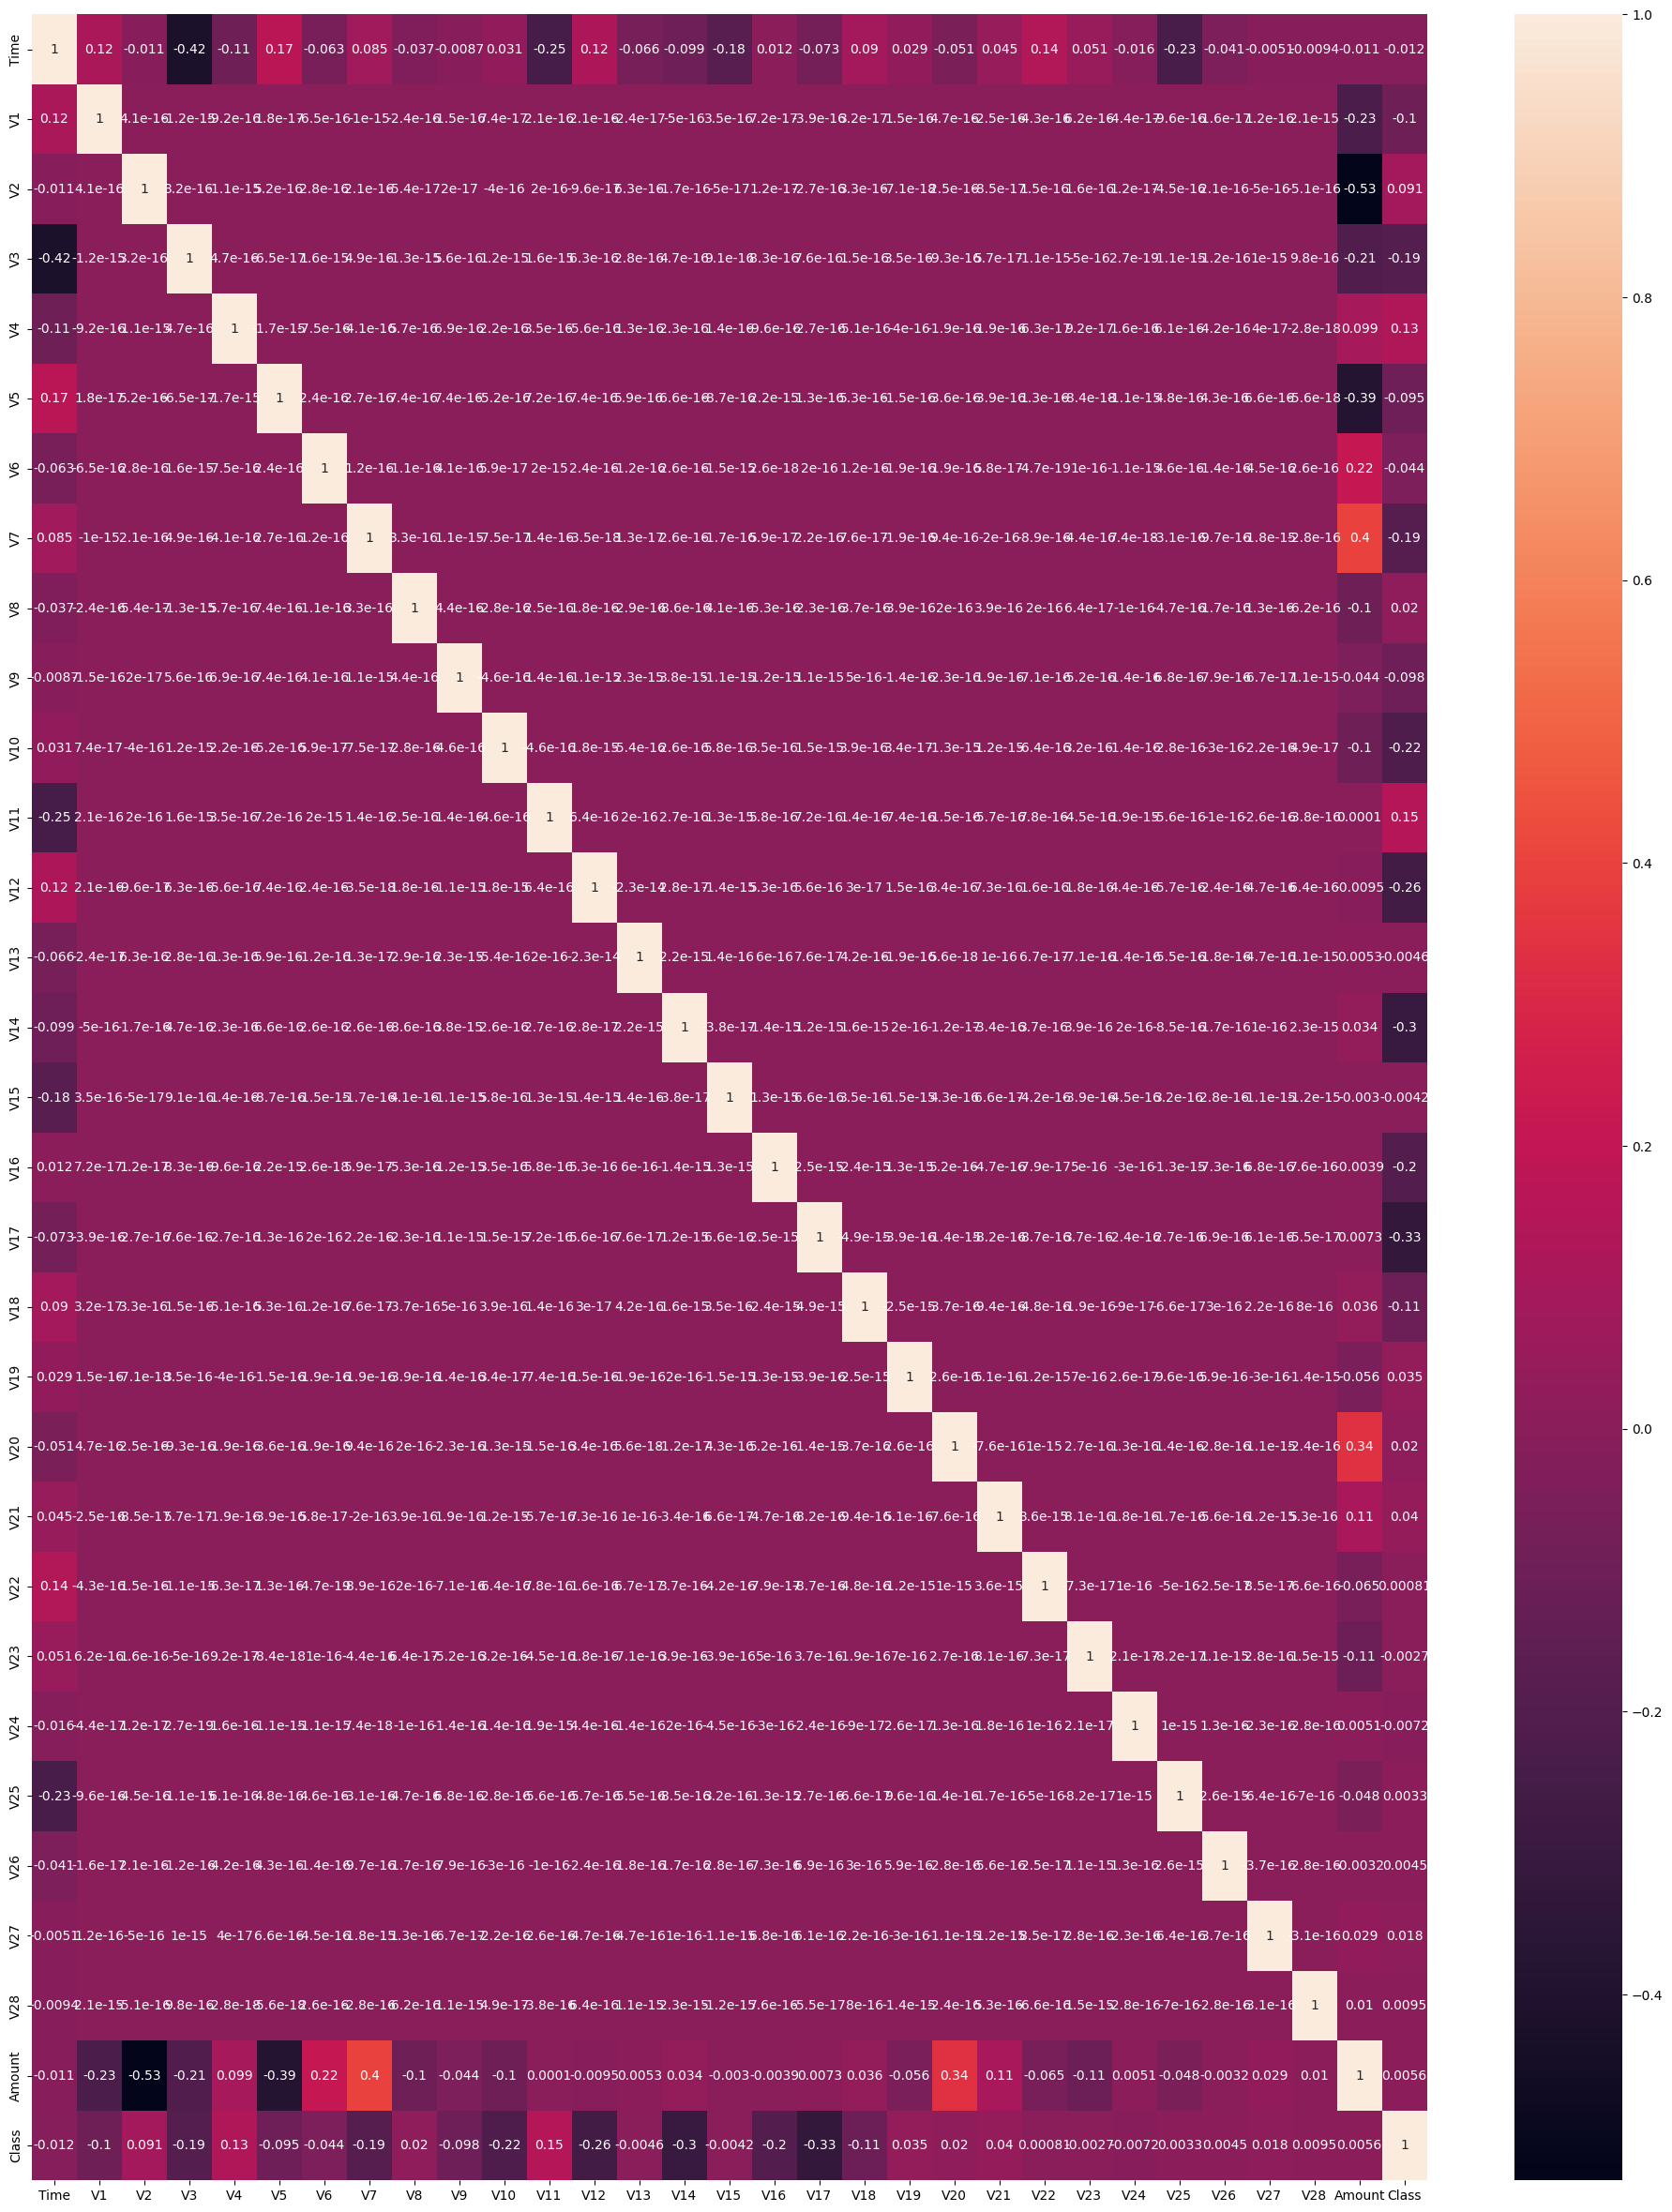

In [26]:
plt.figure(figsize=(24,30))
sns.heatmap(df.corr(),annot=True)

DETECTION ML ALGORITHMS

In [27]:
X=df.drop(columns='Class')
y=df['Class']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [31]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)


LogisticRegression()

In [32]:
y_pred=log_model.predict(X_test)

In [33]:
accuracy=accuracy_score(y_test,y_pred)
classification=classification_report(y_test,y_pred)

In [34]:
print('Accuracy Score: ',accuracy)
print('Classification Report: ')
print(classification)

Accuracy Score:  0.9991924440855307
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



Decision Tree

In [35]:
dtree_model=DecisionTreeClassifier()
dtree_model.fit(X_train,y_train)



DecisionTreeClassifier()

In [36]:
y_pred=dtree_model.predict(X_test)
dtree_accuracy=accuracy_score(y_test,y_pred)
dtree_classification=classification_report(y_test,y_pred)

In [37]:
print('Accuracy Score: ',dtree_accuracy)
print('Classification Report: ')
print(dtree_classification)

Accuracy Score:  0.9992802219023208
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.79      0.80      0.80       101

    accuracy                           1.00     56962
   macro avg       0.90      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



KNN

In [39]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)


knn_y_pred=knn_model.predict(X_test)
knn_accuracy=accuracy_score(y_test,knn_y_pred)
knn_classification=classification_report(y_test,knn_y_pred)

In [40]:
print('Accuracy Score: ',knn_accuracy)
print('Classification Report: ')
print(knn_classification)

Accuracy Score:  0.9994908886626171
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.90      0.80      0.85       101

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
random_model=RandomForestClassifier()
random_model.fit(X_train,y_train)


random_y_pred=knn_model.predict(X_test)
random_accuracy=accuracy_score(y_test,random_y_pred)
random_classification=classification_report(y_test,random_y_pred)

In [42]:
print('Accuracy Score: ',random_accuracy)
print('Classification Report: ')
print(random_classification)

Accuracy Score:  0.9994908886626171
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.90      0.80      0.85       101

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Thank you
